- Choose Stakeholder: For whom are you performing this analysis (Every Door Real Estate)
- Business Understanding: at least 2 important parameters estimates as recomendations
- Data Understanding: Whats in this data, how relevant is this data
- Data Prep: Train/Test split, Nulls, Duplicates, Outlires, Log transformation, encoding variables (one-hot-encoding, binning), polynomial features, interation terms, SCALE
- At least one non numaric feature included in a model
- First simple model: what is your model-less baseline
- Interactive Modeling: Iterate by adding complexity( more columns, different interations:
- Each iteration of your model adheres to assumptions of liniear reg
    Linear Relationship, low Multicollinearity(VIF), Normal dis of   Errors(Q-Qplot)(lower the score the more), Homoskedasticity of Errors
- Interpreting models: check if your input variables are statistically significant. R2. 

- Jupiter notebook Flow: 
- Business Problem
- Data understanding
- Load data
- Initial exploration of data 
- Heat map
- Histograms to see how data is distributed
- Train-test-split
- Data cleaning of train
- Test for multicollinearity 
- use multicollinearity and business question to drop columns we don’t want to use
- Decide which categorical data to use, transform any we keep.
- Standardize data for distribution
- Run dummy regression - title model one
- Run 2nd regression model
- Test assumptions, decide what to do
- Run 3rd regression model
- Test assumptions, decide what to do
- Run another model if needed
- Test assumptions
- Interpret results
- Graph could be helpful here

# Business Understanding

Our Stakeholder are Real Estate agencies in King County, Washington. The year is 2016. Real Estate agencies want to stand out in the competitive Seattle Housing Market and learn what factors for homes lead to better than average sale prices to focus their listing efforts on those homes.

In the following project, we take a look at the King County House Data and find a linear regression model that allows us to make inferences on what factors will lead to a house selling for above the average home price. 

* Import necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
import statsmodels.api as sm

In [2]:
#importing the dataset as df
df = pd.read_csv('data/kc_house_data.csv')

# Data Exploration

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

This is our first look at the data set, it's mostly complete. There are some nulls in yr_rennovated, might have to take care of those if we determine this is relevant

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#found question marks (?) in sqft_basement:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2240.0        1
508.0         1
1248.0        1
2360.0        1
1852.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [8]:
df['sqft_basement'].replace(to_replace='?', value=0, inplace=True) #replace ? with zero
df['sqft_basement'].value_counts() #check to make sure it works

0.0       12826
0           454
600.0       217
500.0       209
700.0       208
          ...  
20.0          1
2120.0        1
556.0         1
906.0         1
2240.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [9]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

In [10]:
df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
df = df.drop(df['sqft_basement'])

In [11]:
#change rennovated into just a 'yes, no': 
df.yr_renovated.value_counts()

0.0       16771
2014.0       71
2013.0       31
2007.0       30
2000.0       29
          ...  
1950.0        1
1954.0        1
1959.0        1
1946.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [12]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [13]:
df['is_rennovated'] = df['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
df['is_rennovated'].value_counts()

0    20563
1      731
Name: is_rennovated, dtype: int64

In [14]:
df = df.drop(['yr_renovated'], axis=1)

In [15]:
df['view'].value_counts()

NONE         19149
AVERAGE        946
GOOD           502
FAIR           325
EXCELLENT      310
Name: view, dtype: int64

In [16]:
is_view_dummies = pd.get_dummies(df['view'], drop_first=True)

In [17]:
#dropping view column
df = df.drop(['view'], axis=1)

In [18]:
#adding our new dummy variables for view: 
df = pd.concat([df, is_view_dummies], axis=1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,lat,long,sqft_living15,sqft_lot15,has_basement,is_rennovated,EXCELLENT,FAIR,GOOD,NONE
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,...,47.7210,-122.319,1690,7639,1,1,0,0,0,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,...,47.7379,-122.233,2720,8062,0,0,0,0,0,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,...,47.5208,-122.393,1360,5000,1,0,0,0,0,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,...,47.6168,-122.045,1800,7503,0,0,0,0,0,1
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,Average,...,47.6561,-122.005,4760,101930,1,0,0,0,0,1


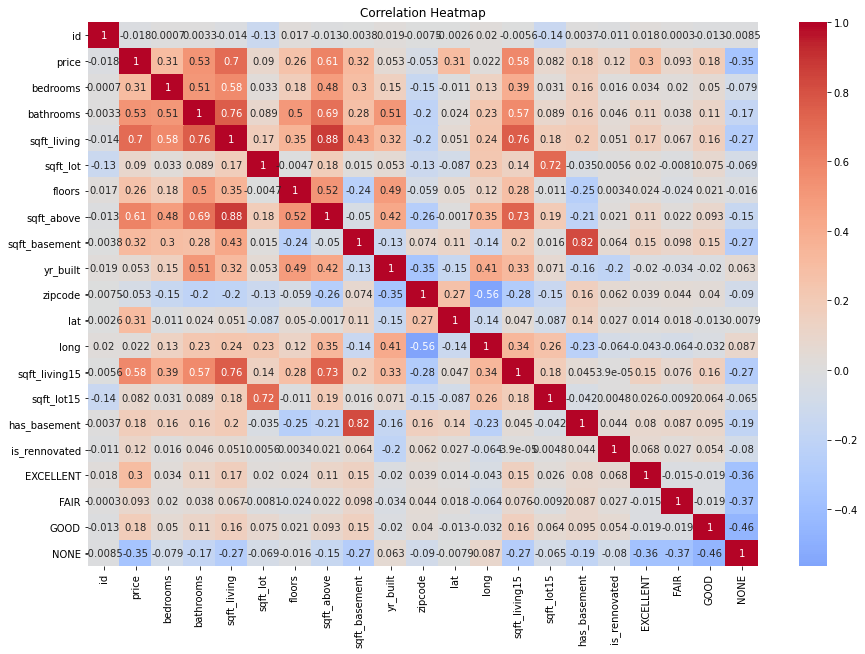

In [19]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observations: Collineraity is when one feature variable in a regression model is highly linearly correlated with another feature variable. Based on the initial exploration above we can see that the following variables are highly correlated with each other (>.7) indicating multicollinearity there are collinearity between: 

1) [sqft_living] and ['sqft_above','bathrooms','sqft_living15'] correlation
2) [sqft_lot] and [sqft_lot_15] correlation
3) [sqft_above] and [bathrooms] correlation

Based on this we may choose to drop sqft_living15, sqft_above and sqft_lot15

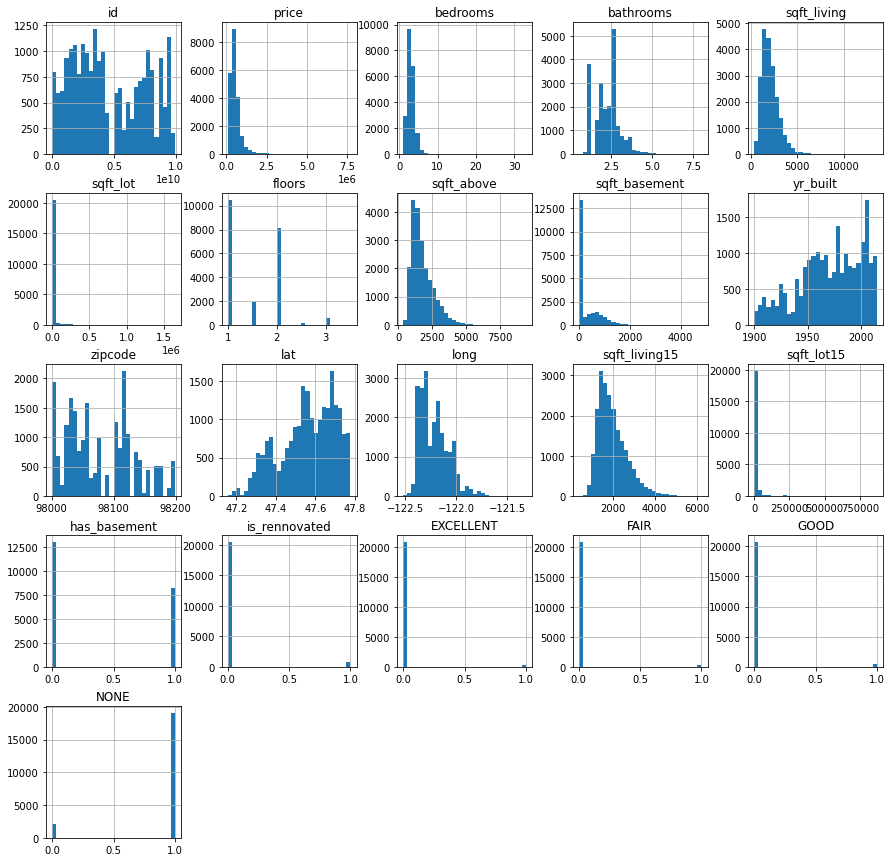

In [22]:
# Plot all features to check for distribution
df.hist(figsize  = [15, 15],bins=30) 
plt.show();

In [23]:
#looking at what factors have high correlation with our price variable: 
salecorr = df.corr()['price'].sort_values(ascending=False)
salecorr

price            1.000000
sqft_living      0.701844
sqft_above       0.605954
sqft_living15    0.584083
bathrooms        0.525374
sqft_basement    0.320514
bedrooms         0.308843
lat              0.306931
EXCELLENT        0.302077
floors           0.257021
GOOD             0.183634
has_basement     0.178587
is_rennovated    0.116936
FAIR             0.092541
sqft_lot         0.090232
sqft_lot15       0.082050
yr_built         0.052739
long             0.021679
id              -0.018343
zipcode         -0.053020
NONE            -0.353898
Name: price, dtype: float64

# Training Data

* Splitting data into our "training" set and "testing" set. The training set is 75% of the data and the testing set is 25% per default train_test_split()

In [24]:
y = df["price"]
X = df.drop("price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Cleaning Data

## Choosing data to drop
When choosing what data is relevant to our stakeholders, we take the information we learned from the data exploration above combined with our stakeholders' needs - to make inferences on what factors can lead to higher-than-average sales prices of homes. 

**Location**
Latitude and longitude are specific points on a map and all unique, making predictions difficult to base off these variables. We have zip code data that will better serve for location for our modeling. This is why we’re dropping `lat` and `long`. Zip Codes refer to postal routes and oftentimes don't correlate well with defined neighborhoods. Our clients are also working with the entire King County, so we chose to drop the `zipcodes` column. 

**ID**
We are droping ID because it is a unique id for the home which we do not need for our modeling. 

**Date:** this entire dataframe takes place in the course of just two years, to identify trends in sale price by time of year such as month we would need to see more than two year's of data. Because of this we decided to drop `date`. 

The following were highly correlated as noted above and we will be dropping them to avoid multicollinarity: 

`sqft_lot15`, `sqft_above`, `sqft_living15`


In [25]:
#dropping columns: 
X_train = X_train.drop(columns=['lat', 'long','id', 'date', 'zipcode', 'sqft_lot15', 'sqft_above', 'sqft_living15'])

In [26]:
#taking a look at remainder of numeric and non-numeric columns to see if we need to clean things up more: 
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_train_non_numeric = X_train.select_dtypes(exclude=['int64', 'float64'])
print(X_train_non_numeric.columns)
print(X_train_numeric.columns)

Index(['waterfront', 'condition', 'grade', 'EXCELLENT', 'FAIR', 'GOOD',
       'NONE'],
      dtype='object')
Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'has_basement', 'is_rennovated'],
      dtype='object')


In [27]:
#checking our null values: 
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2342
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
has_basement        0
is_rennovated       0
EXCELLENT           0
FAIR                0
GOOD                0
NONE                0
dtype: int64

In [28]:
#Taking a look at 'waterfront' value: 

X_train['waterfront'] = X_train.waterfront.fillna('N/A') #filling NA with zero

waterfront_or = X_train.loc[:, ['waterfront']]

encoder_water = OrdinalEncoder()

encoder_water.fit(waterfront_or)

encoder_water.categories_[0]

water_trans = encoder_water.transform(waterfront_or)

water_trans = water_trans.flatten()

X_train['waterfront'] = water_trans

In [29]:
#seeing how many properties are considered 'waterfront':
X_train.waterfront.value_counts()

1.0    14103
0.0     1757
2.0      110
Name: waterfront, dtype: int64

Since only .0067% of the houses are waterfront, it would not be a good predicter variable so we dropped waterfront. 

In [30]:
X_train.drop(columns='waterfront', inplace=True)

In [31]:
#Now addressing condition column: 
condition = X_train[["condition"]]
ohe = OneHotEncoder(categories="auto",sparse=False,handle_unknown="ignore")
ohe.fit(condition)
condition_trans = ohe.transform(condition)
condition_trans1= pd.DataFrame(condition_trans, columns=ohe.categories_[0],index=X_train.index)
condition_trans1
X_train.drop("condition", axis=1, inplace=True)
X_train = pd.concat([X_train, condition_trans1], axis=1)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,has_basement,is_rennovated,EXCELLENT,FAIR,GOOD,NONE,Average,Fair,Good,Poor,Very Good
16258,4,1.00,1190,8875,1.5,7 Average,0.0,1946,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
11211,3,2.00,1410,7466,1.0,7 Average,0.0,1983,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
9497,2,1.50,1480,15641,1.0,7 Average,0.0,1940,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
6213,4,2.50,4090,215186,2.0,8 Good,420.0,1979,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
8427,3,1.00,1790,6120,1.0,6 Low Average,0.0,1937,0,1,0,0,0,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11587,4,3.25,3090,6744,2.0,9 Better,0.0,1923,0,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0
12267,4,2.00,2220,5821,1.5,7 Average,840.0,1916,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
5693,4,3.25,3990,9786,2.0,9 Better,0.0,2004,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
1003,3,2.25,1422,3677,2.0,7 Average,0.0,2012,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0


# Scaling

In [ ]:
# ss = StandardScaler()
# X_train.drop(columns=['grade', 'sqft_basement', 'sqft_lot'], inplace=True)
# ss.fit(X_train)
# x_scaled = ss.transform(X_train)


It's neccessary to 'scale' the data in order to make the different variables comparable: 

In [33]:
X_train_scaled = (X_train - np.mean(X_train)) / np.std(X_train)
Y_test_scaled = (X_test - np.mean(X_test) / np.std(X_test))

# Models

In [34]:
#setting up a dummy regressor - this sets up a baseline to use to compare 
#linear regression models we build going forward
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.score(X_train, y_train)


0.0

In [35]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_basement,yr_built,has_basement,is_rennovated,EXCELLENT,FAIR,GOOD,NONE,Average,Fair,Good,Poor,Very Good
16258,4,1.0,1190,8875,1.5,7 Average,0.0,1946,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
11211,3,2.0,1410,7466,1.0,7 Average,0.0,1983,0,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
9497,2,1.5,1480,15641,1.0,7 Average,0.0,1940,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
6213,4,2.5,4090,215186,2.0,8 Good,420.0,1979,1,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0
8427,3,1.0,1790,6120,1.0,6 Low Average,0.0,1937,0,1,0,0,0,1,1.0,0.0,0.0,0.0,0.0


## Question One: does Square Foot Living affect Price

In [41]:
f = 'price ~ sqft_living'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.067e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:18:00   Log-Likelihood:            -2.9583e+05
No. Observations:               21294   AIC:                         5.917e+05
Df Residuals:                   21292   BIC:                         5.917e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.318e+04   4437.085     -9.731      0.000   -5.19e+04   -3.45e+04
sqft_living   280.4546      1.951    143.770      0.000     276.631     284.278
==============================================================================
Omnibus:                    14664.577   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           548144.376
Skew:                           2.833   Prob(JB):                         0.00
Kurtosis:                      27.201   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusion: for every additional square foot, the price increases by $280

In [42]:
# QQ-plot of residuals
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)
fig.show()

NameError: name 'stats' is not defined

## Does a home renovation affect price? 

In [45]:
f = 'price ~ sqft_living + is_rennovated'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.061e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:23:09   Log-Likelihood:            -2.9569e+05
No. Observations:               21294   AIC:                         5.914e+05
Df Residuals:                   21291   BIC:                         5.914e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.539e+04   4410.012    -10.292      0.000    -5.4e+04   -3.67e+04
sqft_living     278.8034      1.940    143.680      0.000     275.000     282.607
is_rennovated  1.645e+05   9787.598     16.805      0.000    1.45e+05    1.84e+05
==============================================================================
Omnibus:                    14533.145   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           531251.347
Skew:                           2.802   Prob(JB):                         0.00
Kurtosis:                      26.819   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This pushed our R Squared value from .493 with only sq ft to .499, not much difference. 

Let's try EXCELLENT and FAIR views: 

In [46]:
f = 'price ~ sqft_living + EXCELLENT + FAIR'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     8009.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:25:38   Log-Likelihood:            -2.9501e+05
No. Observations:               21294   AIC:                         5.900e+05
Df Residuals:                   21290   BIC:                         5.901e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.457e+04   4293.887     -5.723      0.000    -3.3e+04   -1.62e+04
sqft_living   266.2944      1.909    139.512      0.000     262.553     270.036
EXCELLENT    5.858e+05   1.46e+04     40.108      0.000    5.57e+05    6.14e+05
FAIR         1.528e+05   1.41e+04     10.841      0.000    1.25e+05     1.8e+05
==============================================================================
Omnibus:                    13786.756   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           532259.239
Skew:                           2.567   Prob(JB):                         0.00
Kurtosis:                      26.949   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R2 now at 0.530
now let's try sq ft, view and bathrooms: 

In [47]:
f = 'price ~ sqft_living + EXCELLENT + FAIR + bathrooms'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     6006.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:27:15   Log-Likelihood:            -2.9501e+05
No. Observations:               21294   AIC:                         5.900e+05
Df Residuals:                   21289   BIC:                         5.901e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.406e+04   5085.967     -4.730      0.000    -3.4e+04   -1.41e+04
sqft_living   266.7071      2.898     92.019      0.000     261.026     272.388
EXCELLENT    5.857e+05   1.46e+04     40.080      0.000    5.57e+05    6.14e+05
FAIR         1.528e+05   1.41e+04     10.835      0.000    1.25e+05     1.8e+05
bathrooms    -648.4278   3427.084     -0.189      0.850   -7365.772    6068.916
==============================================================================
Omnibus:                    13783.923   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           531913.711
Skew:                           2.566   Prob(JB):                         0.00
Kurtosis:                      26.941   Cond. No.                     1.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

No Budge. 

OK let's try

In [48]:
f = 'price ~ sqft_living + bathrooms'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 1.034e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:28:04   Log-Likelihood:            -2.9583e+05
No. Observations:               21294   AIC:                         5.917e+05
Df Residuals:                   21291   BIC:                         5.917e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.864e+04   5271.355     -7.330      0.000    -4.9e+04   -2.83e+04
sqft_living   284.0446      2.979     95.345      0.000     278.205     289.884
bathrooms   -5673.9906   3558.748     -1.594      0.111   -1.26e+04    1301.424
==============================================================================
Omnibus:                    14643.354   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           545600.624
Skew:                           2.828   Prob(JB):                         0.00
Kurtosis:                      27.144   Cond. No.                     7.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
f = 'price ~ sqft_living + EXCELLENT + FAIR + bathrooms + sqft_lot + yr_built'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     4571.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:29:20   Log-Likelihood:            -2.9424e+05
No. Observations:               21294   AIC:                         5.885e+05
Df Residuals:                   21287   BIC:                         5.886e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.027e+06   1.28e+05     39.227      0.000    4.78e+06    5.28e+06
sqft_living   257.9078      2.850     90.494      0.000     252.322     263.494
EXCELLENT    5.436e+05   1.41e+04     38.464      0.000    5.16e+05    5.71e+05
FAIR         1.202e+05   1.36e+04      8.823      0.000    9.35e+04    1.47e+05
bathrooms    6.001e+04   3667.866     16.360      0.000    5.28e+04    6.72e+04
sqft_lot       -0.2239      0.041     -5.490      0.000      -0.304      -0.144
yr_built    -2616.0945     66.335    -39.437      0.000   -2746.117   -2486.072
==============================================================================
Omnibus:                    13328.383   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           507525.678
Skew:                           2.443   Prob(JB):                         0.00
Kurtosis:                      26.413   Cond. No.                     3.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""